In [1]:
from music21 import *

In [2]:
from IPython.display import display, Image, Audio, HTML

In [3]:
greekModes = [ 'ionian', 'dorian', 'phrygian',
'lydian', 'mixolydian', 'aeolian', 'locrian' ]

In [7]:
def circleOfFifths():
    fifths = []

    fifthsScale = scale.CyclicalScale('c4', 'p5')
    
    for p in fifthsScale.getPitches('c4', 'c11'):
        
        if key.pitchToSharps(p,'major') <= 7:
            MAJOR = str(p.simplifyEnharmonic().name)
            MINOR = str(key.Key(MAJOR, 'major').relative.tonic.simplifyEnharmonic().name).lower()

        else:
            MAJOR = str(p.getEnharmonic().simplifyEnharmonic().name)
            MINOR = str(key.Key(MAJOR, 'major').relative.tonic.simplifyEnharmonic().name).lower()
        
        fifths.append( [ MAJOR, MINOR ] )

        #fifths.append(p.simplifyEnharmonic())
        
    return fifths

In [4]:
def returnScale(tonic='c', mode='major', ownKey = False):
    
    modes = [ 'ionian','dorian','phrygian',
              'lydian','mixolydian','aeolian',
              'locrian','major','minor']
    
    if not mode in modes:
        mode = 'major'
        
    if mode == 'ionian': mode = 'major'
    if mode == 'aeolian': mode = 'minor'

        
    tonic_pitch = pitch.Pitch(tonic)
    #key_enharmonic = tonic_pitch.getEnharmonic().simplifyEnharmonic().name
    key_enharmonic = tonic_pitch
    scale_sharps = key.pitchToSharps(key_enharmonic, mode)

    #    myfunc = eval("scale.{0}Scale".format(mode.capitalize()))
    scale_func = getattr(scale, "{0}Scale".format(mode.capitalize()))
    pitches = scale_func(key_enharmonic).getPitches()

        
    myKeySig = key.KeySignature(scale_sharps)
    
    mystream = stream.Stream()
    
    if ownKey:
        mystream.append(myKeySig)

    for x in range(0, len(pitches)):
        mynote = note.Note(pitches[x])

        mynote.addLyric(interval.notesToInterval(pitches[0], mynote).directedName)
        mynote.addLyric(interval.notesToInterval(pitches[(x-1 if x>0 else 0)], mynote).directedName)
        
        mystream.append(mynote)
        
    return mystream

In [9]:
def returnTriads(tonic='c', mode='major', ownKey = False):
    
    modes = [ 'ionian','dorian','phrygian',
              'lydian','mixolydian','aeolian',
              'locrian','major','minor']
    
    if mode in modes:
        if mode == 'ionian':
            mode = 'major'
        elif mode == 'aeolian':
            mode = 'minor'
    else:
        mymode = 'major'
        
    myfunc = eval("scale.{0}Scale".format(mode.capitalize()))
    #pitches = myfunc(tonic).getPitches()

    pitches = myfunc(tonic).getChord(tonic+"4",tonic+"6").pitches
    scaleSharps = key.pitchToSharps(tonic, mode)
    myKeySig = key.KeySignature(scaleSharps)
    
    mystream = stream.Stream()
    
    myduration = duration.Duration("whole")
    
    if ownKey:
        mystream.append(myKeySig)
        
    for x in range(0,8):
        mychord = chord.Chord([ pitches[x], pitches[x+2], pitches[x+4] ], duration=myduration)
        mychord.addLyric(roman.romanNumeralFromChord(mychord,key.Key(tonic,mode)).figure)
        mychord.addLyric(harmony.chordSymbolFigureFromChord(mychord))
        
        mystream.append(mychord)
        
    return mystream

In [10]:
def midiStream(mystream):

    try:
        if myAudio:
            pass
    except:
        from IPython.display import Audio as myAudio
    
    mymidi_filename = mystream.write('midi')
    
    return myAudio(filename=mymidi_filename)

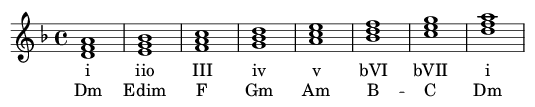

In [12]:
triads = returnTriads('D','aeolian',True).write()
Image(filename=triads)

In [14]:
circleOfFifths()

[['C', 'a'],
 ['G', 'e'],
 ['D', 'b'],
 ['A', 'f#'],
 ['E', 'c#'],
 ['B', 'g#'],
 ['F#', 'd#'],
 ['C#', 'a#'],
 ['A-', 'f'],
 ['E-', 'c'],
 ['B-', 'g'],
 ['F', 'd'],
 ['C', 'a']]

In [ ]:
for mode in greekModes:
    filenm = returnScale('c',mode=mode,ownKey=True).write()

    display(Image(filename=filenm))

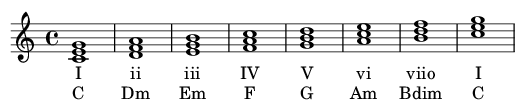

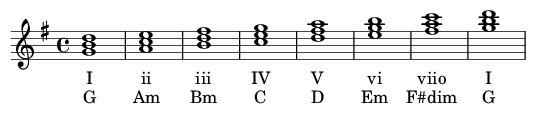

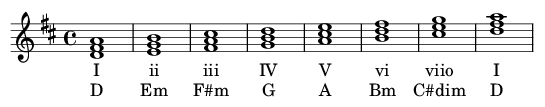

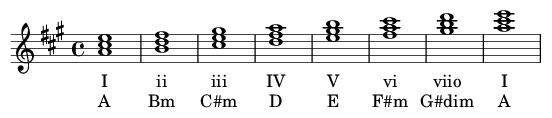

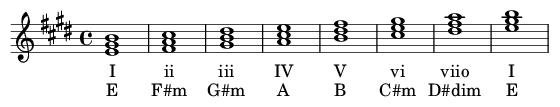

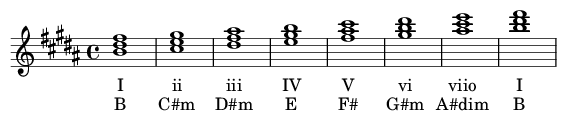

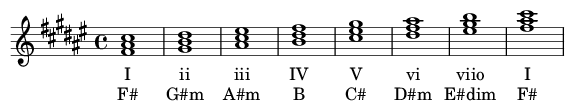

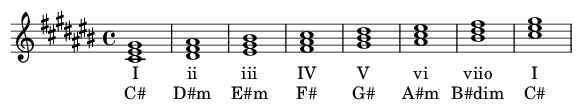

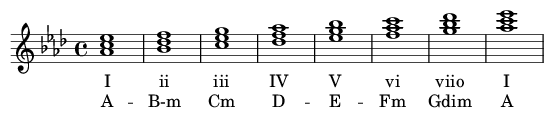

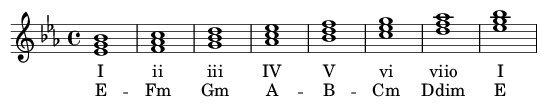

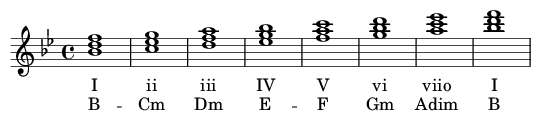

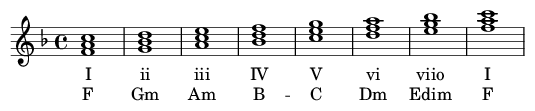

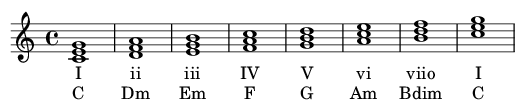

In [15]:
ffts = circleOfFifths()

for item in ffts:
    filenm = returnTriads(item[0],mode='major',ownKey=True).write()

    display(Image(filename=filenm))

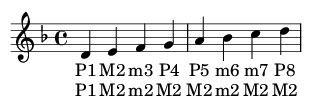

In [5]:
triads = returnScale('D','aeolian',True).write()
Image(filename=triads)